# **Data Load**

In [49]:
import pandas as pd
train_df = pd.read_csv("train.csv")
train_df.shape

(20001, 25)

In [50]:
test_df = pd.read_csv("test.csv")
test_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20002,100000,2,1,2,38,3,2,-1,-1,...,1151,35499,33051,36627,0,1151,35499,10000,6627,7000
1,20003,200000,2,1,1,39,-2,-2,-2,-2,...,359,0,353,342,2294,359,0,353,342,0
2,20004,400000,2,1,1,37,-1,0,-1,0,...,26717,25434,6973,9899,31008,26862,3000,2000,3000,0
3,20005,500000,2,1,1,47,-2,-2,-2,-2,...,966,6675,-10,2055,299,1169,6708,0,2065,1133
4,20006,230000,2,1,1,45,-1,-1,-1,-1,...,967,0,699,499,0,967,0,699,499,0


# **Data Clean**

In [51]:
# Renaming columns for better clarity and understanding
train_df.rename(columns={
    'LIMIT_BAL': 'Credit Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education Level',
    'MARRIAGE': 'Marital Status',
    'AGE': 'Age',
    'PAY_0': 'Payment Status (Month 1)',
    'PAY_2': 'Payment Status (Month 2)',
    'PAY_3': 'Payment Status (Month 3)',
    'PAY_4': 'Payment Status (Month 4)',
    'PAY_5': 'Payment Status (Month 5)',
    'PAY_6': 'Payment Status (Month 6)',
    'BILL_AMT1': 'Bill Amount (Month 1)',
    'BILL_AMT2': 'Bill Amount (Month 2)',
    'BILL_AMT3': 'Bill Amount (Month 3)',
    'BILL_AMT4': 'Bill Amount (Month 4)',
    'BILL_AMT5': 'Bill Amount (Month 5)',
    'BILL_AMT6': 'Bill Amount (Month 6)',
    'PAY_AMT1': 'Payment Amount (Month 1)',
    'PAY_AMT2': 'Payment Amount (Month 2)',
    'PAY_AMT3': 'Payment Amount (Month 3)',
    'PAY_AMT4': 'Payment Amount (Month 4)',
    'PAY_AMT5': 'Payment Amount (Month 5)',
    'PAY_AMT6': 'Payment Amount (Month 6)',
    'default payment next month': 'Default Payment Next Month'
}, inplace=True)

# Verifying the changes
train_df.head()


,ID,Credit Limit,Gender,Education Level,Marital Status,Age,Payment Status (Month 1),Payment Status (Month 2),Payment Status (Month 3),Payment Status (Month 4),...,Bill Amount (Month 4),Bill Amount (Month 5),Bill Amount (Month 6),Payment Amount (Month 1),Payment Amount (Month 2),Payment Amount (Month 3),Payment Amount (Month 4),Payment Amount (Month 5),Payment Amount (Month 6),Default Payment Next Month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
# Check for missing values
print("Missing values in each column:\n", train_df.isnull().sum())


# View data types to confirm correctness
print("Data types:\n", train_df.dtypes)

#View duplicate samples(rows) from train_df
duplicate_samples = train_df[train_df.duplicated(keep=False)]  #Marks all occurrences of duplicate rows as duplicates.
print(duplicate_samples)


Missing values in each column:
 ID                            0
Credit Limit                  0
Gender                        0
Education Level               0
Marital Status                0
Age                           0
Payment Status (Month 1)      0
Payment Status (Month 2)      0
Payment Status (Month 3)      0
Payment Status (Month 4)      0
Payment Status (Month 5)      0
Payment Status (Month 6)      0
Bill Amount (Month 1)         0
Bill Amount (Month 2)         0
Bill Amount (Month 3)         0
Bill Amount (Month 4)         0
Bill Amount (Month 5)         0
Bill Amount (Month 6)         0
Payment Amount (Month 1)      0
Payment Amount (Month 2)      0
Payment Amount (Month 3)      0
Payment Amount (Month 4)      0
Payment Amount (Month 5)      0
Payment Amount (Month 6)      0
Default Payment Next Month    0
dtype: int64
Data types:
 ID                            int64
Credit Limit                  int64
Gender                        int64
Education Level               int6

# **Exploratory Data Analysis (EDA)**

In [53]:
# Summary statistics
print("Summary Statistics:\n", train_df.describe())

Summary Statistics:
                  ID    Credit Limit        Gender  Education Level  \
count  20001.000000    20001.000000  20001.000000     20001.000000   
mean   10001.000000   163304.018799      1.614069         1.836908   
std     5773.935703   128744.108770      0.486827         0.769545   
min        1.000000    10000.000000      1.000000         0.000000   
25%     5001.000000    50000.000000      1.000000         1.000000   
50%    10001.000000   130000.000000      2.000000         2.000000   
75%    15001.000000   230000.000000      2.000000         2.000000   
max    20001.000000  1000000.000000      2.000000         6.000000   

       Marital Status           Age  Payment Status (Month 1)  \
count    20001.000000  20001.000000              20001.000000   
mean         1.556622     35.333633                  0.021399   
std          0.522787      9.210588                  1.121090   
min          0.000000     21.000000                 -2.000000   
25%          1.000000  

In [54]:
# Count unique values for key categorical columns in EDA
columns_to_check = ['Gender', 'Education Level', 'Marital Status',
                    'Payment Status (Month 1)', 'Payment Status (Month 2)', 'Default Payment Next Month']

for column in columns_to_check:
    print(f"\nValue counts for '{column}':")
    print(train_df[column].value_counts())



Value counts for 'Gender':
Gender
2    12282
1     7719
Name: count, dtype: int64

Value counts for 'Education Level':
Education Level
2    9451
1    7114
3    3191
5     151
4      57
6      28
0       9
Name: count, dtype: int64

Value counts for 'Marital Status':
Marital Status
2    10702
1     9034
3      232
0       33
Name: count, dtype: int64

Value counts for 'Payment Status (Month 1)':
Payment Status (Month 1)
 0    9765
-1    3887
 1    2569
 2    1890
-2    1585
 3     202
 4      58
 8      17
 5      13
 6       8
 7       7
Name: count, dtype: int64

Value counts for 'Payment Status (Month 2)':
Payment Status (Month 2)
 0    10448
-1     4115
 2     2742
-2     2341
 3      228
 4       61
 5       20
 1       19
 7       17
 6        9
 8        1
Name: count, dtype: int64

Value counts for 'Default Payment Next Month':
Default Payment Next Month
0    15442
1     4559
Name: count, dtype: int64


# **Histogram for Visualization**

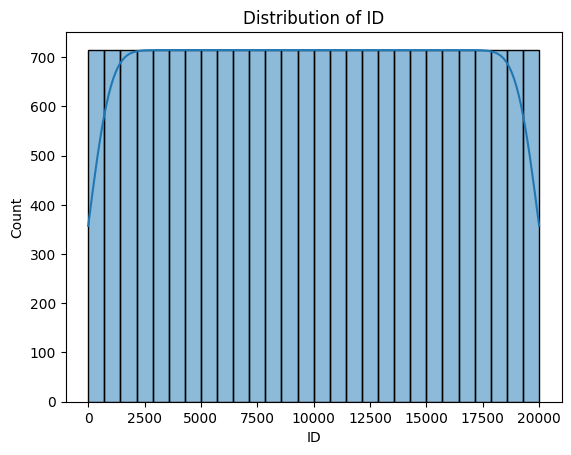

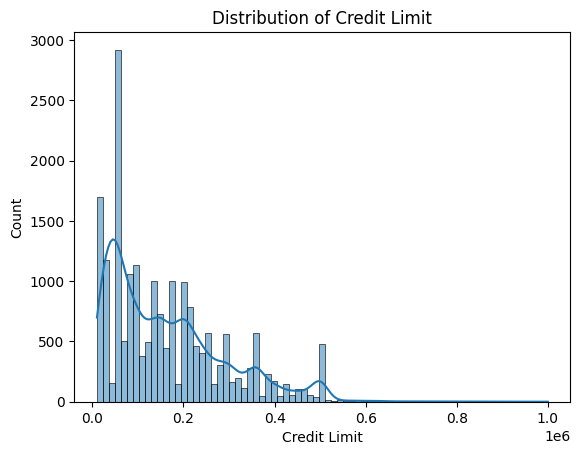

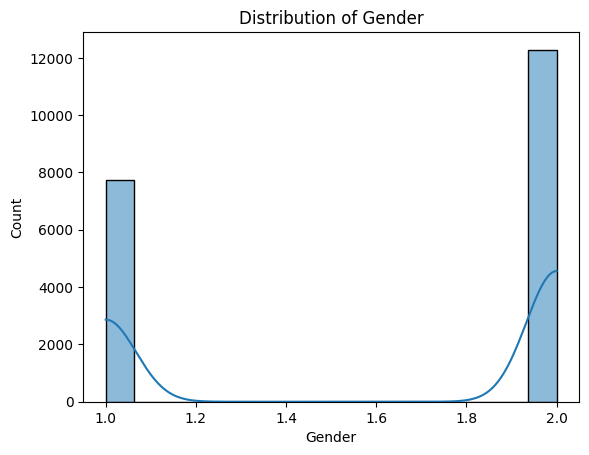

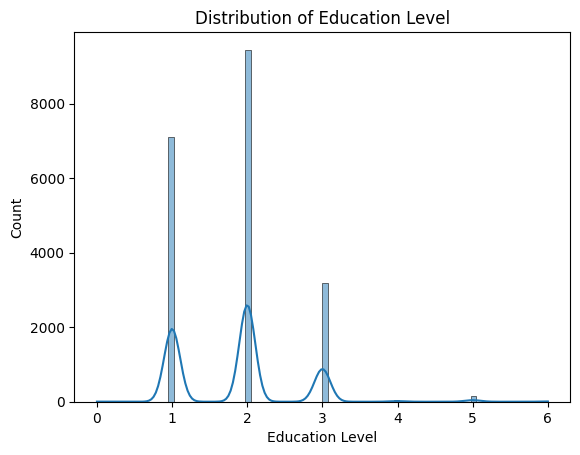

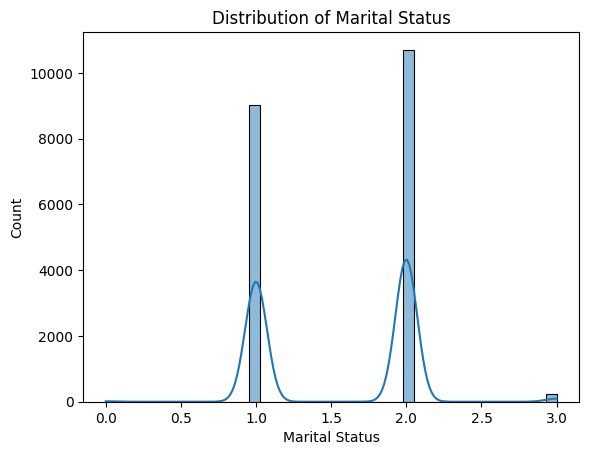

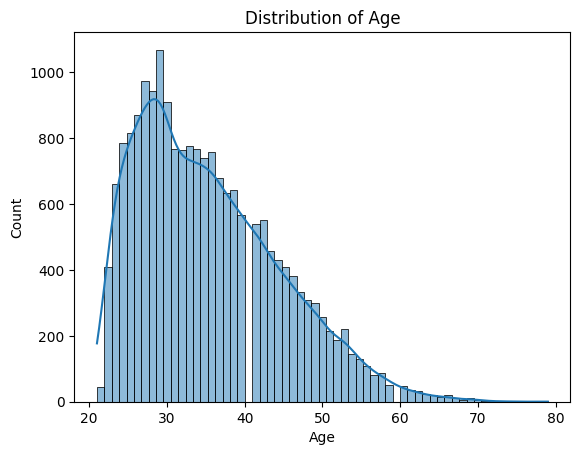

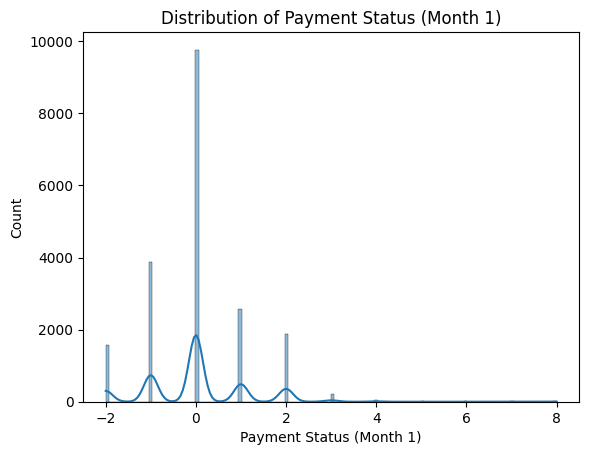

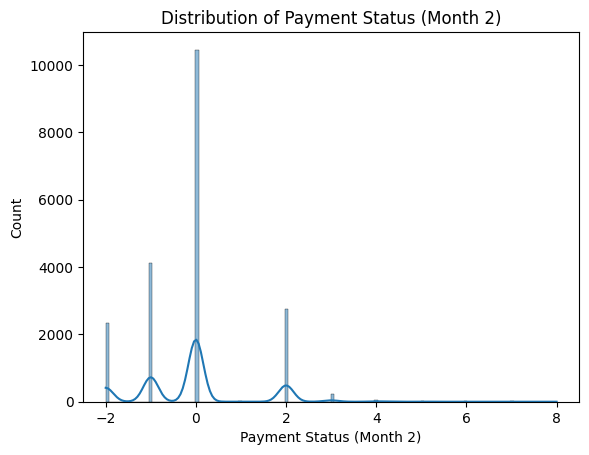

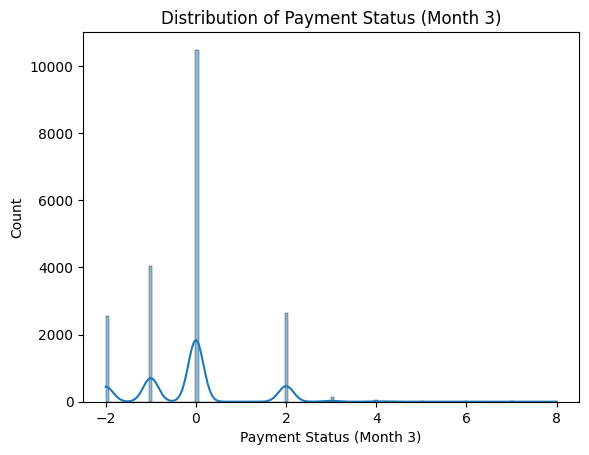

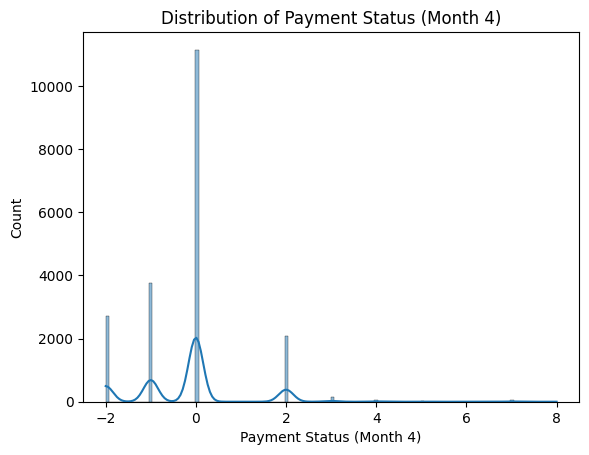

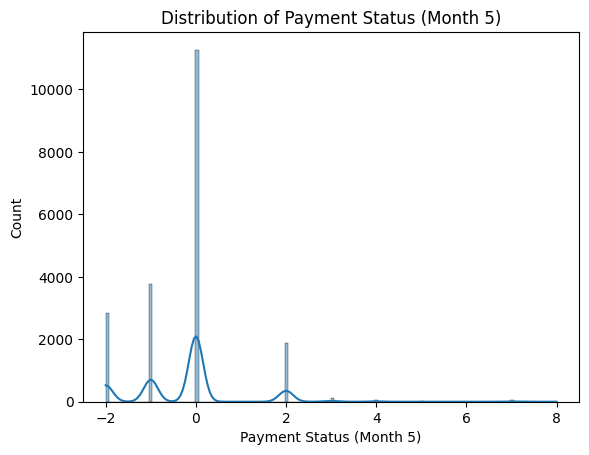

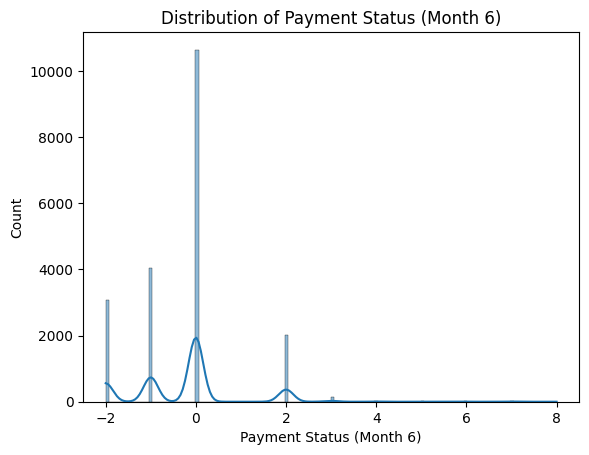

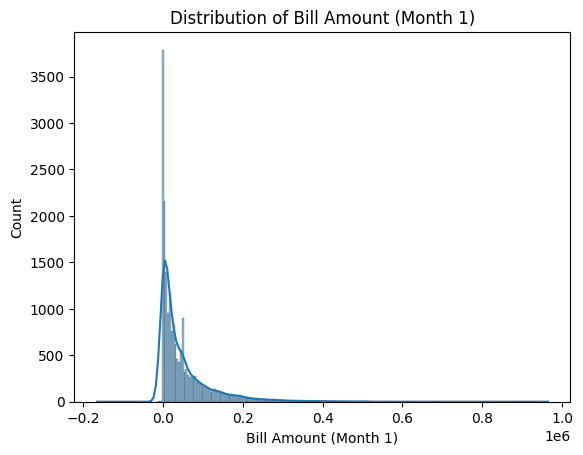

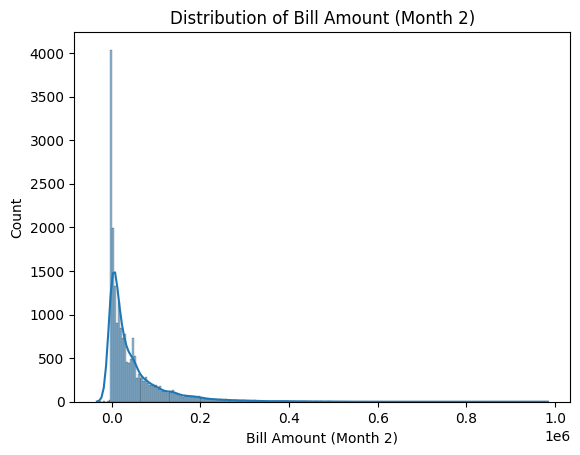

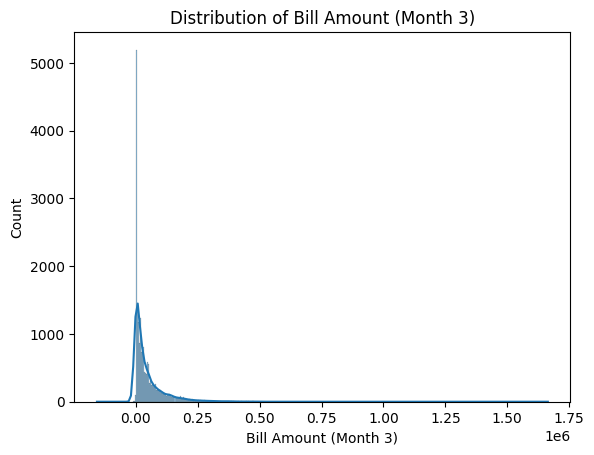

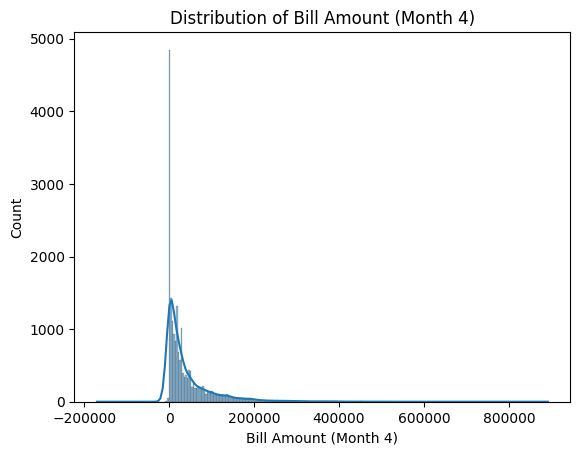

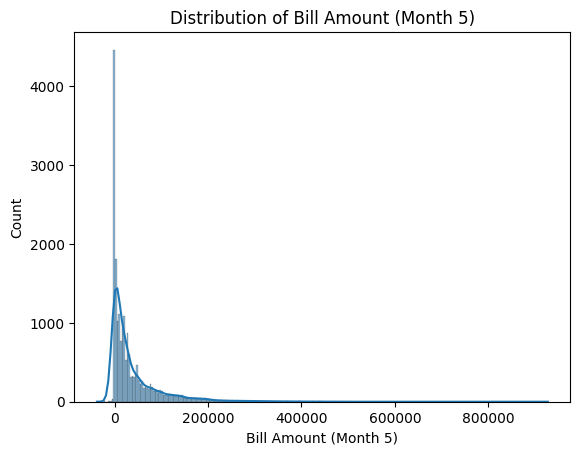

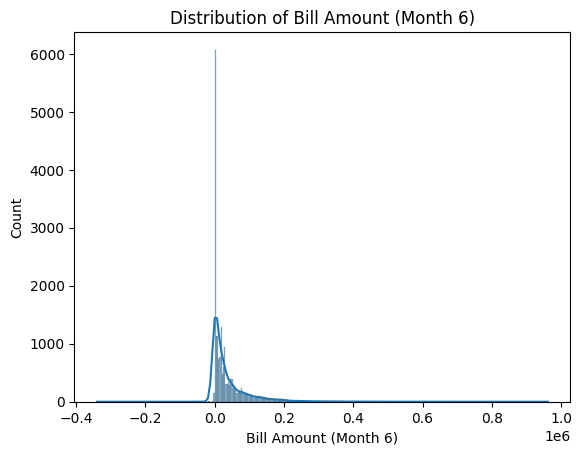

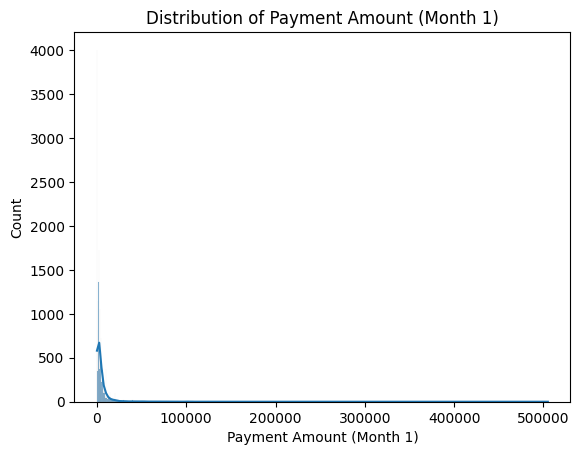

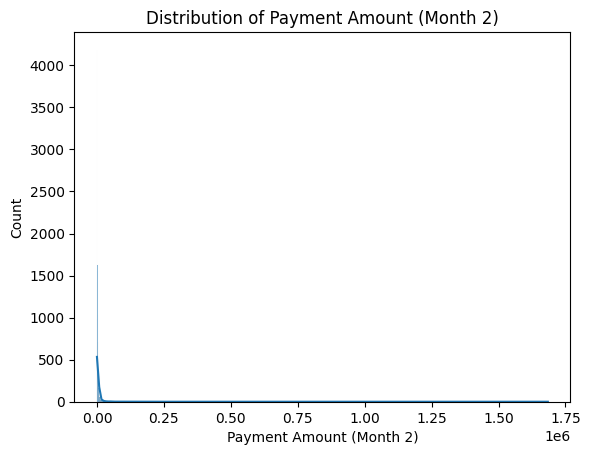

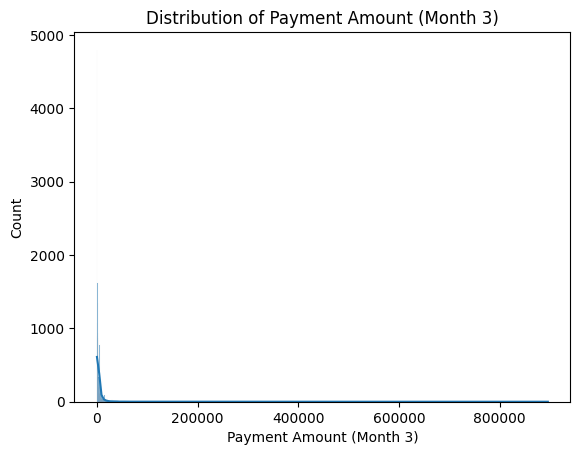

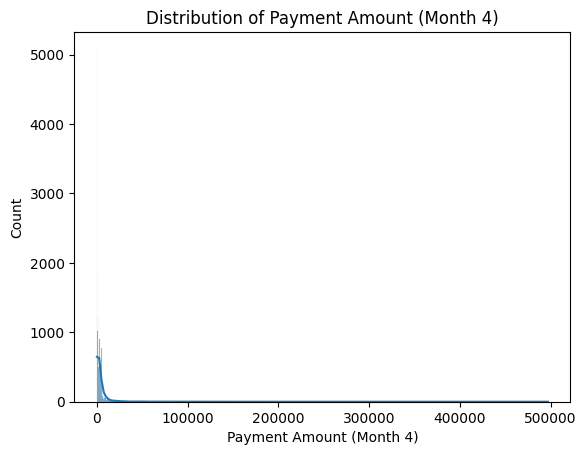

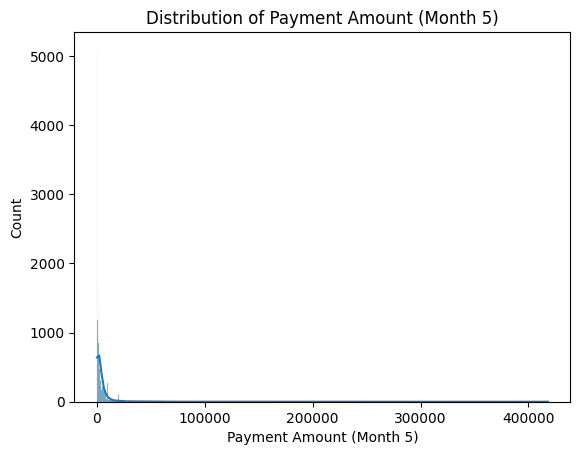

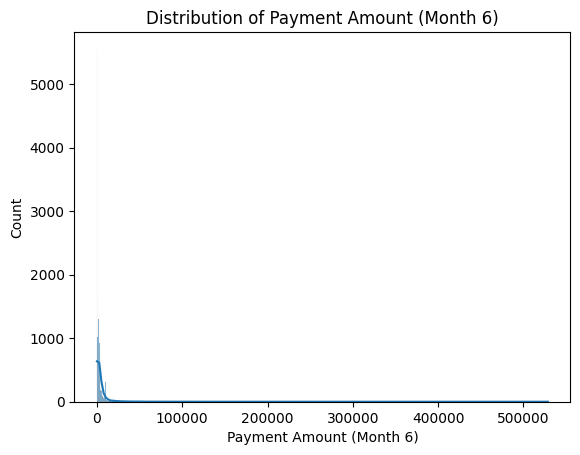

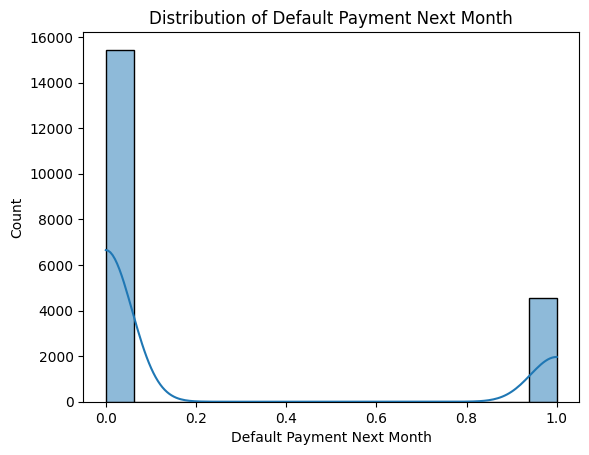

In [55]:
# Visualize distributions for each numeric column
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
for column in train_df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.histplot(train_df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# **Bivariate Graphs**

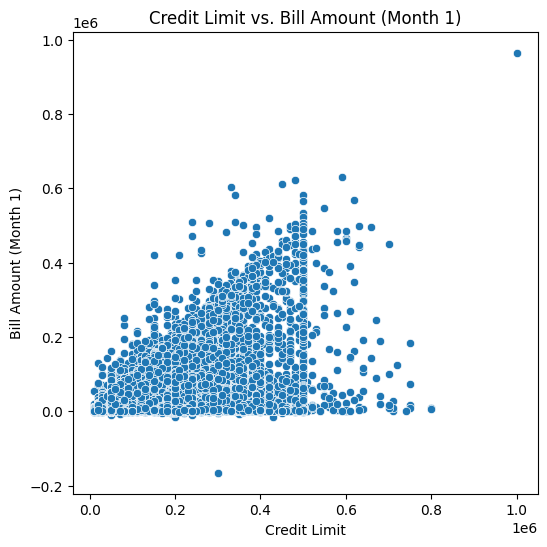

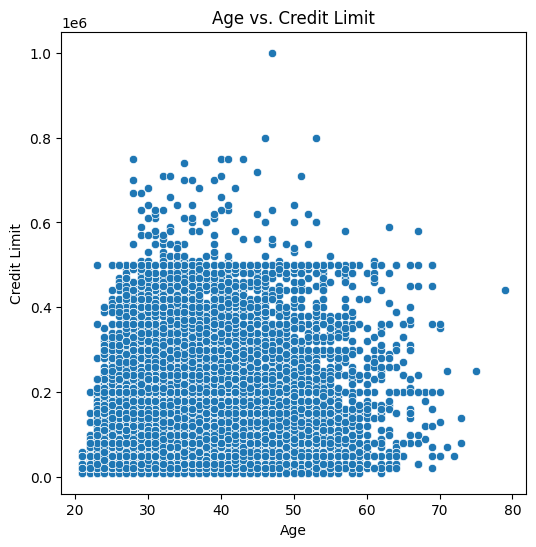

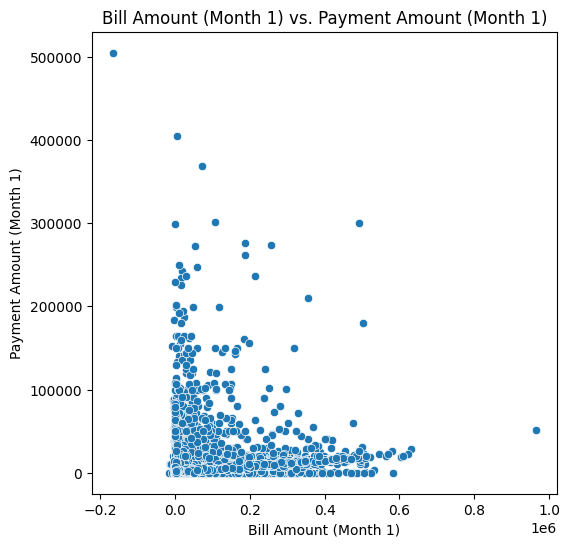

In [56]:
# Bivariate analysis to understand the relationship
## This scatter plot helps in identifying how the available credit limit is correlated with the bill amount for the first month.
# A strong positive or negative correlation could indicate potential trends or outliers that may affect credit decisions.
# Credit Limit vs. Bill Amount (Month 1)
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Credit Limit', y='Bill Amount (Month 1)', data=train_df)
plt.title('Credit Limit vs. Bill Amount (Month 1)')
plt.xlabel('Credit Limit')
plt.ylabel('Bill Amount (Month 1)')
plt.show()

# Age vs. Credit Limit
#By plotting Age against Credit Limit, we aim to see if older individuals tend to have higher or lower credit limits.
# Understanding this can help in demographic-based analysis and model training to predict creditworthiness.
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Age', y='Credit Limit', data=train_df)
plt.title('Age vs. Credit Limit')
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.show()

# Bill Amount (Month 1) vs. Payment Amount (Month 1)
#This scatter plot can reveal whether customers with higher bills are also making larger payments.
# If there's a clear relationship, it may provide insights into payment behaviors and customer financial habits.
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Bill Amount (Month 1)', y='Payment Amount (Month 1)', data=train_df)
plt.title('Bill Amount (Month 1) vs. Payment Amount (Month 1)')
plt.xlabel('Bill Amount (Month 1)')
plt.ylabel('Payment Amount (Month 1)')
plt.show()


# **Correlation Heatmap**




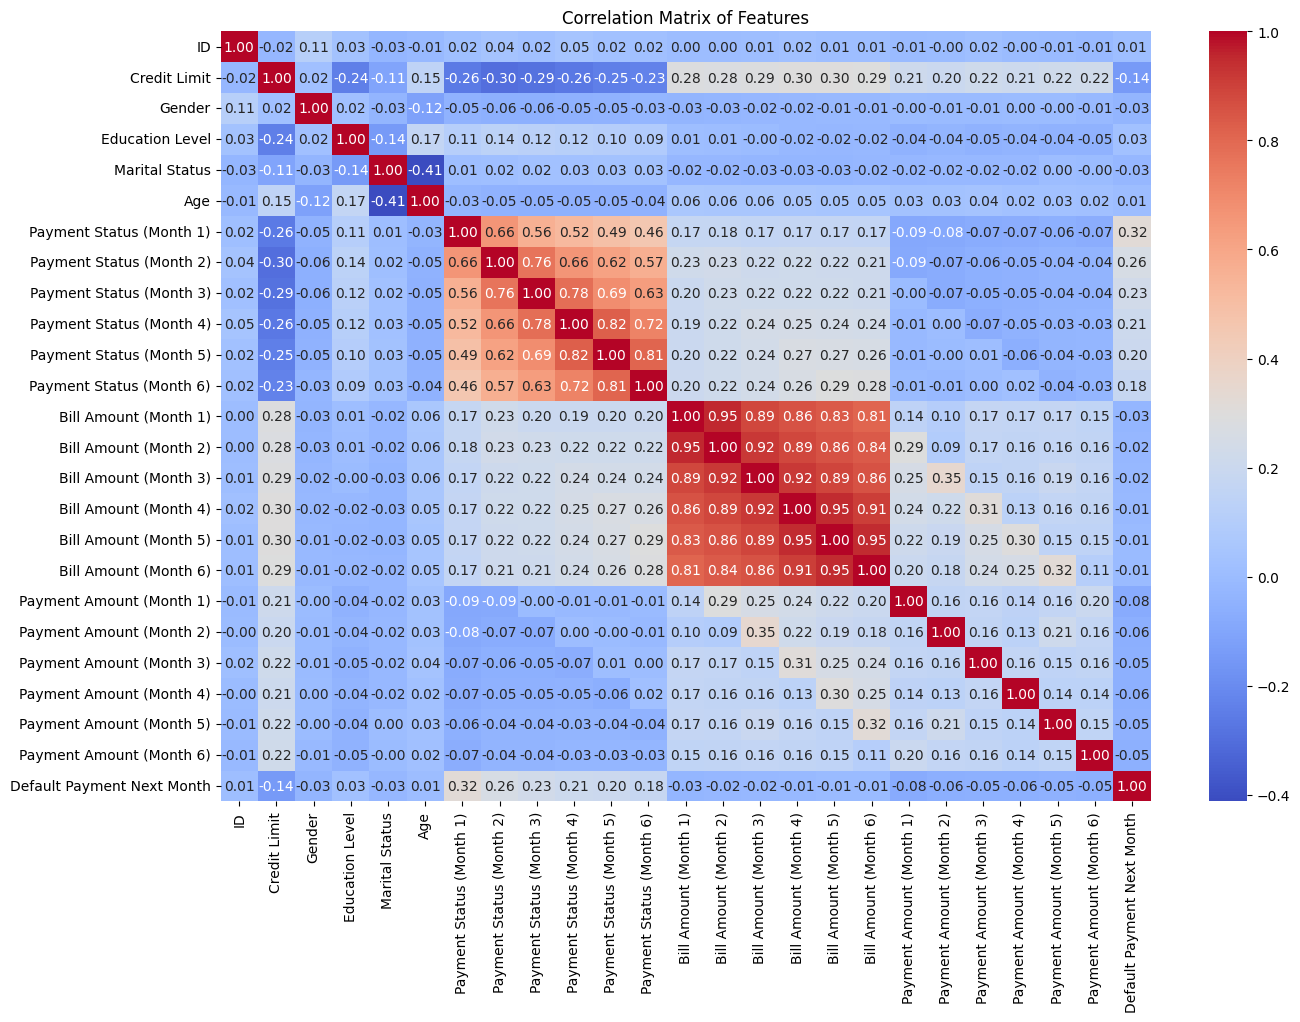

In [57]:
# Correlation heatmap for numeric columns

plt.figure(figsize=(15, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# **Displaying Available Outliers in the Data**

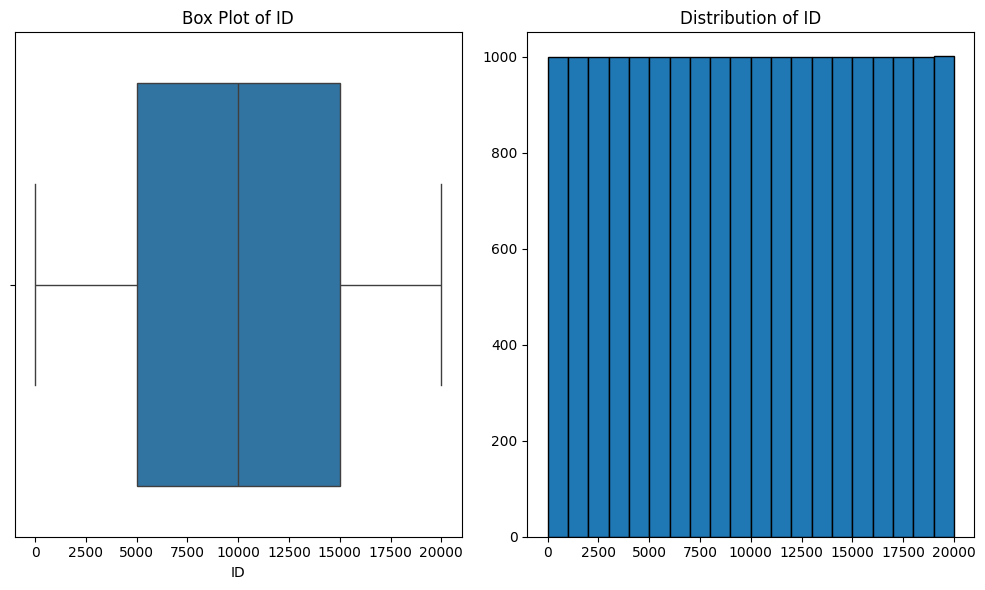

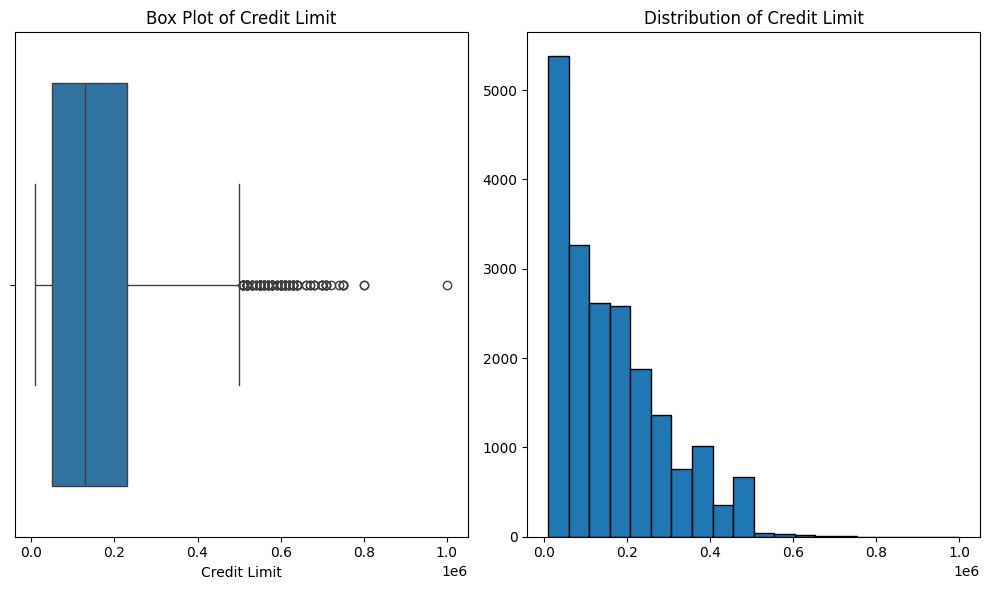

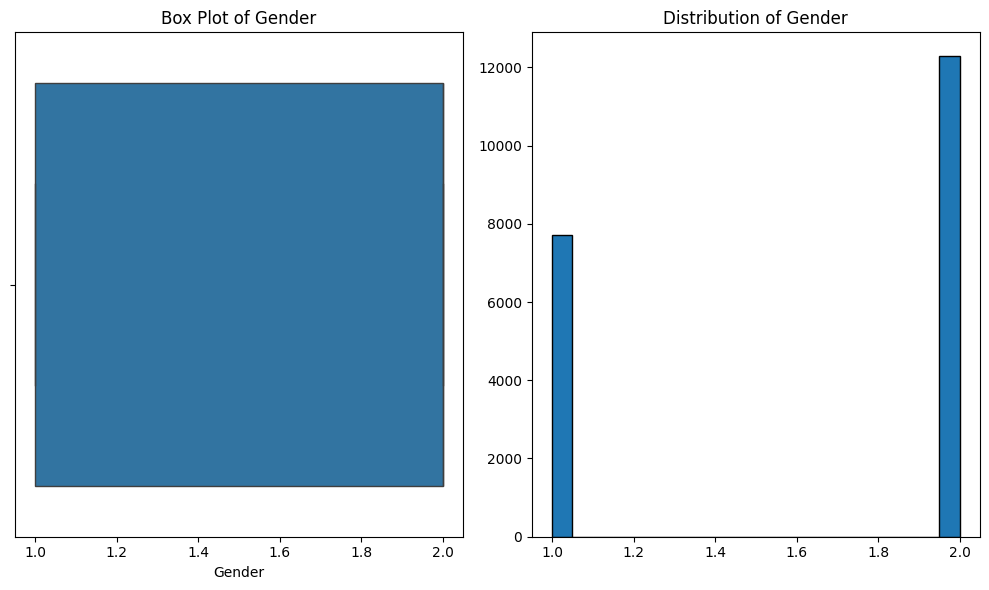

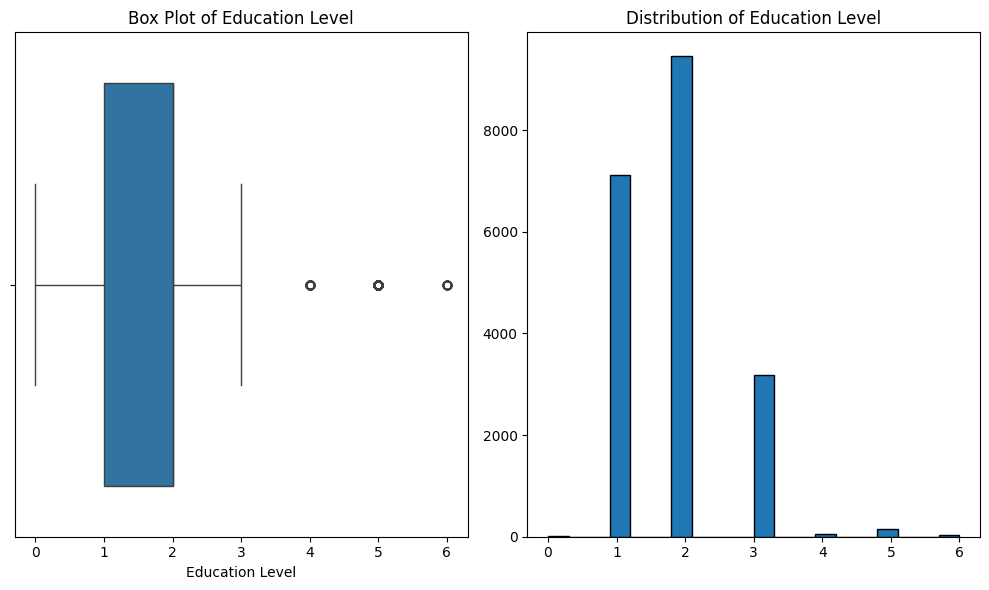

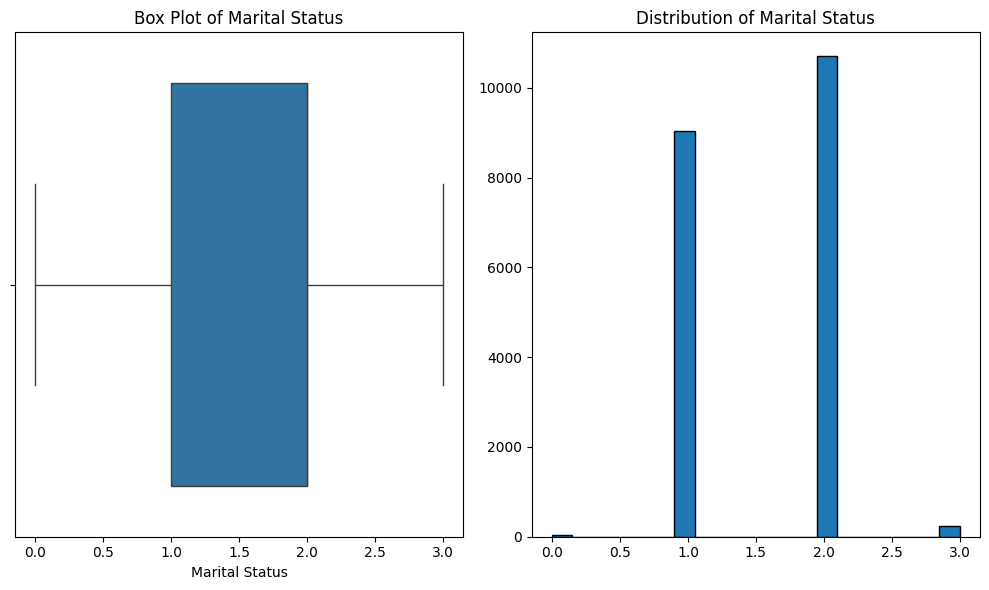

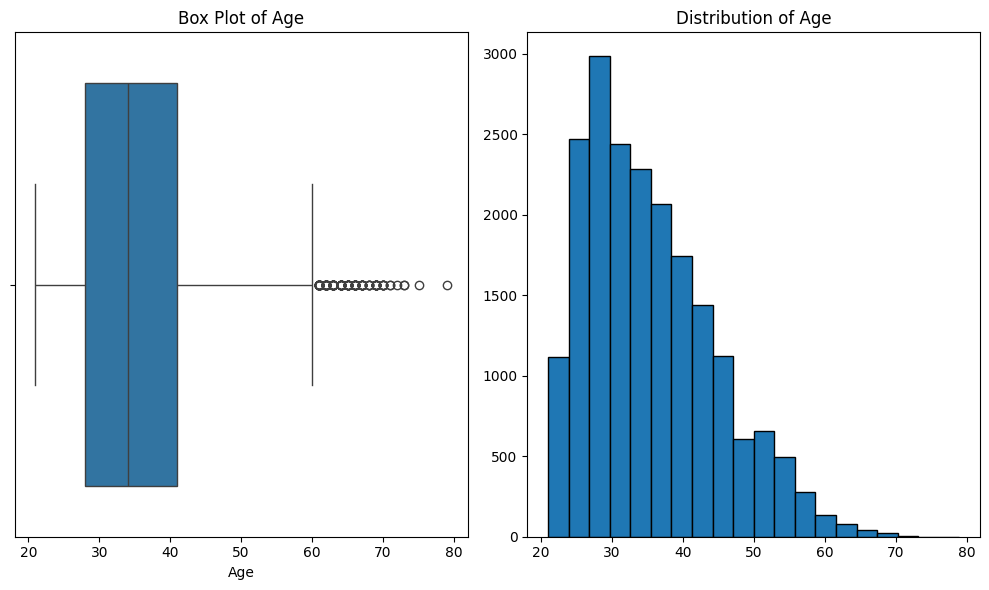

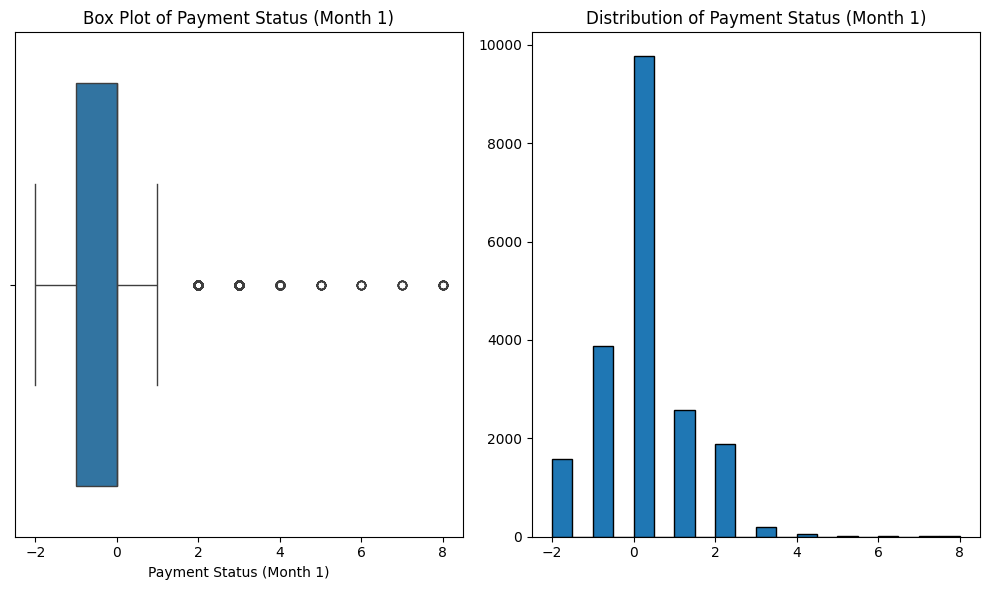

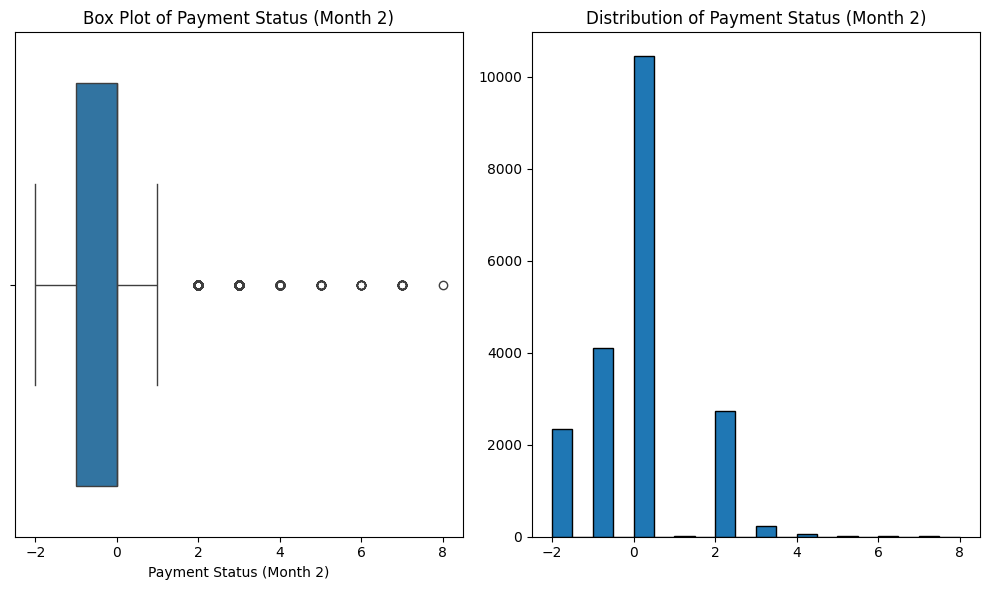

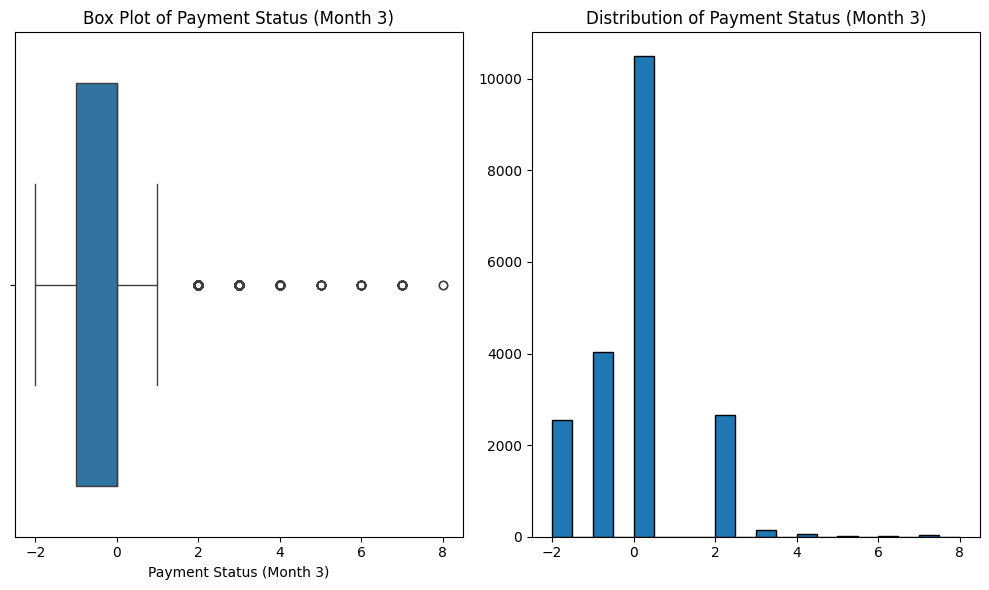

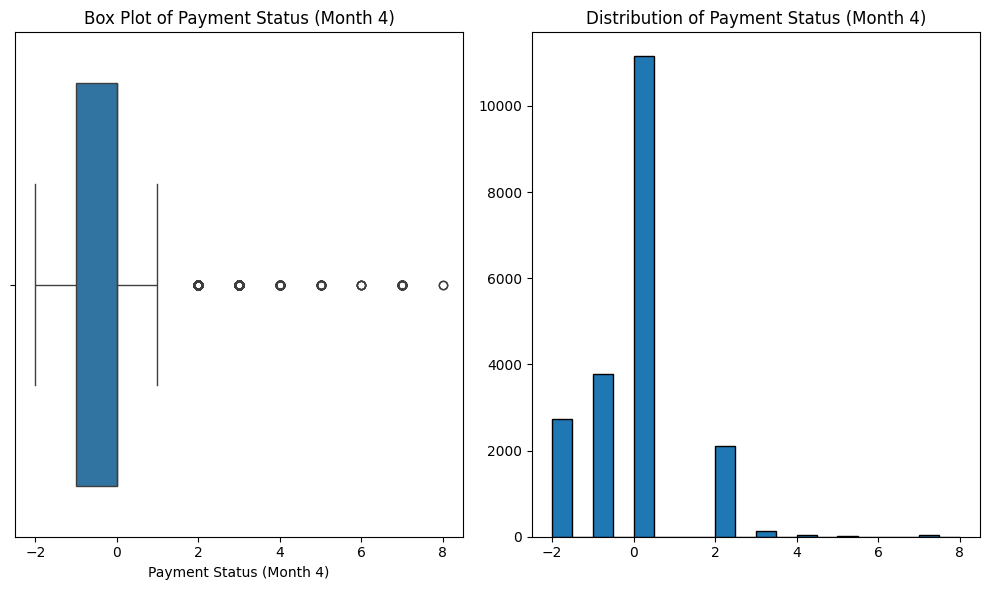

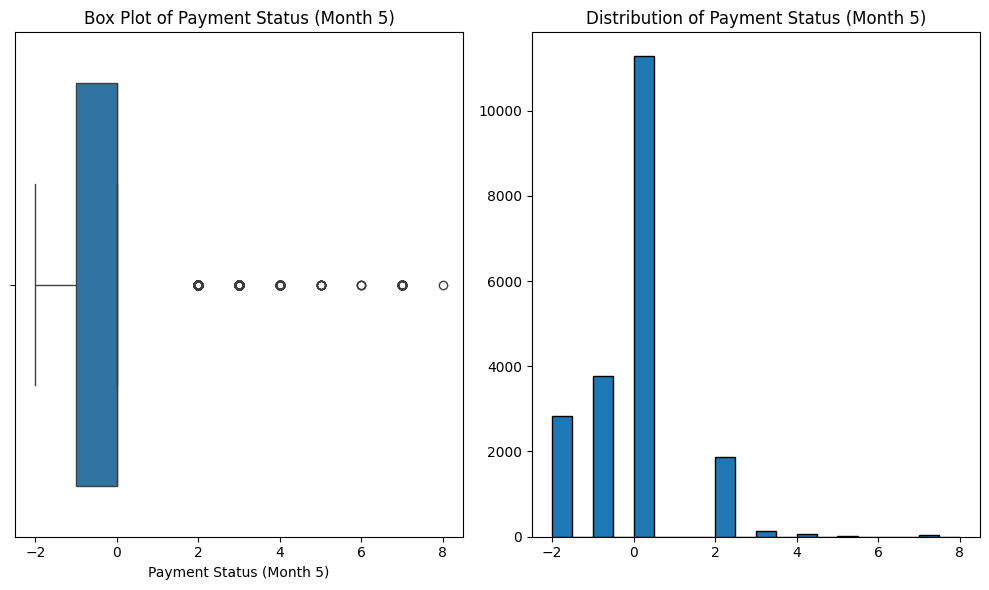

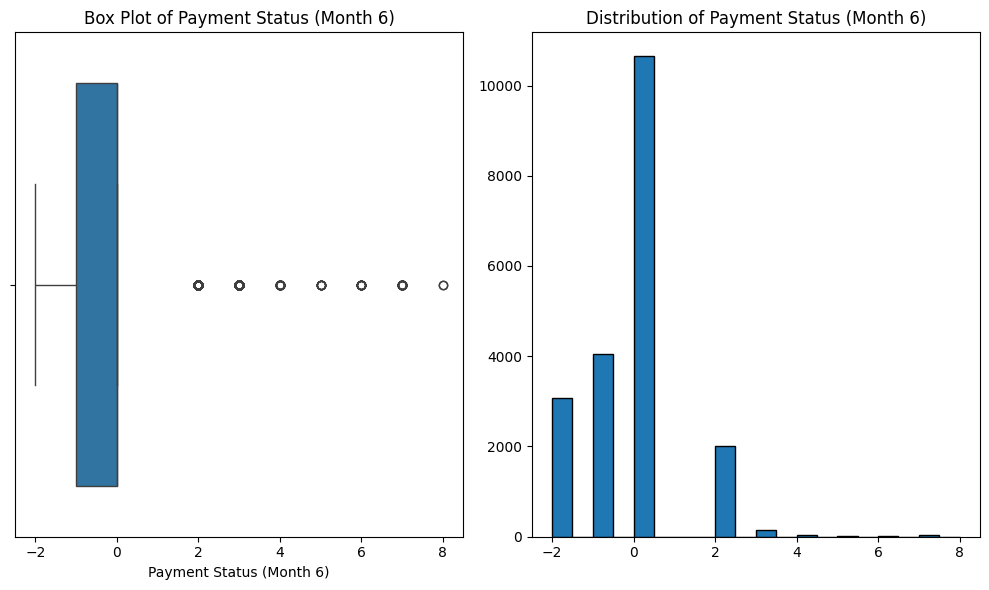

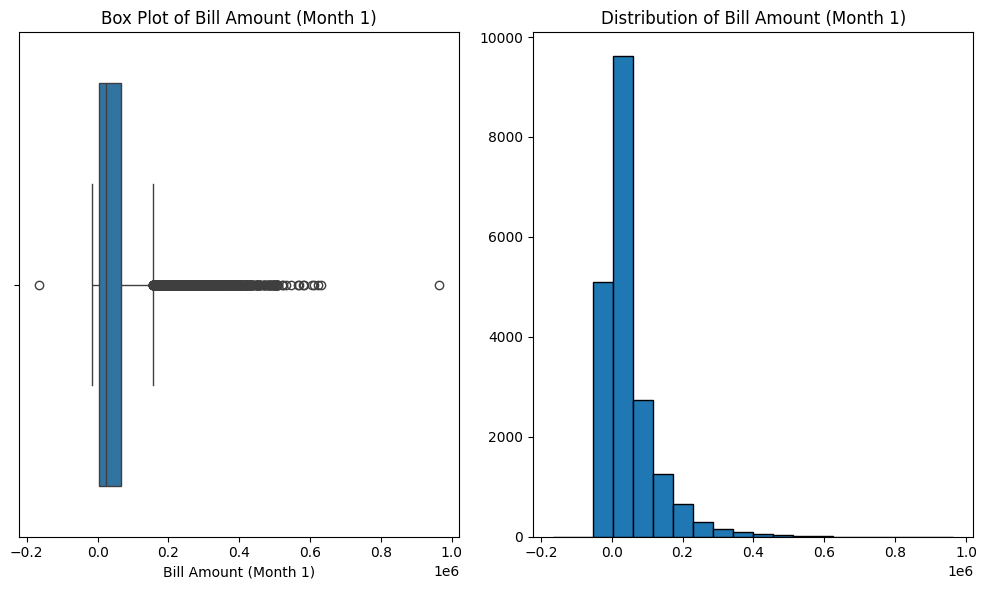

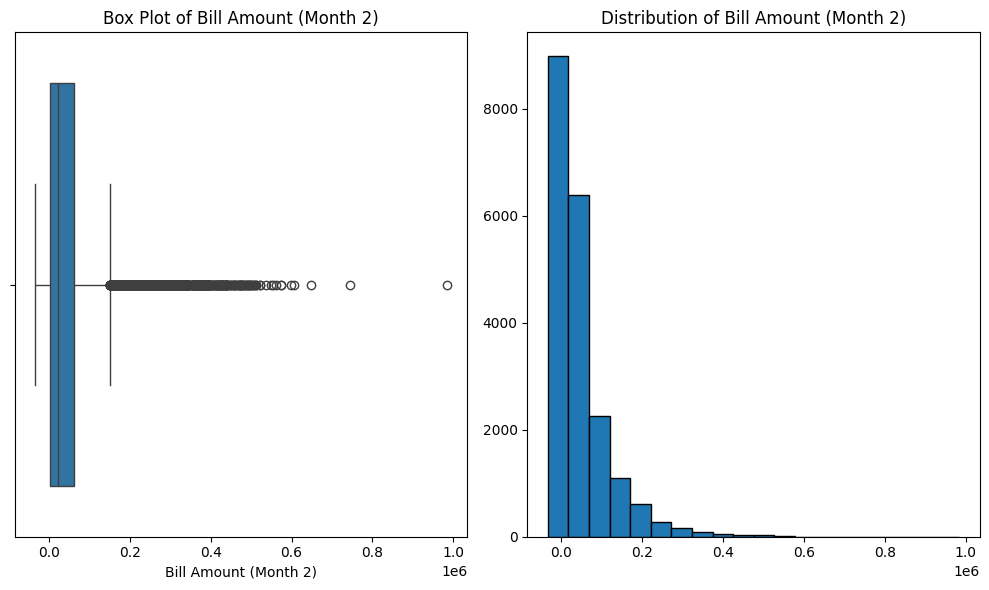

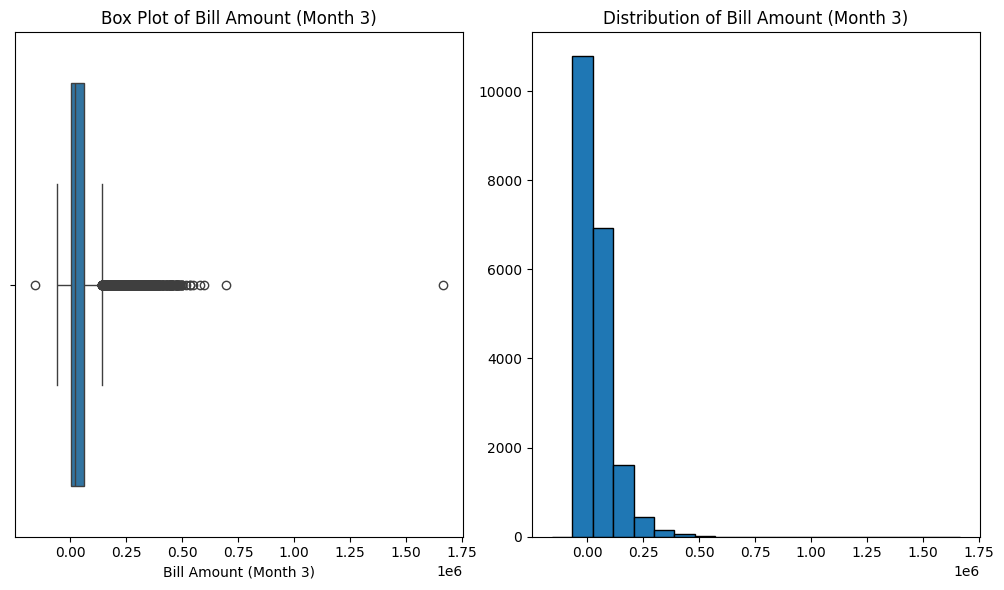

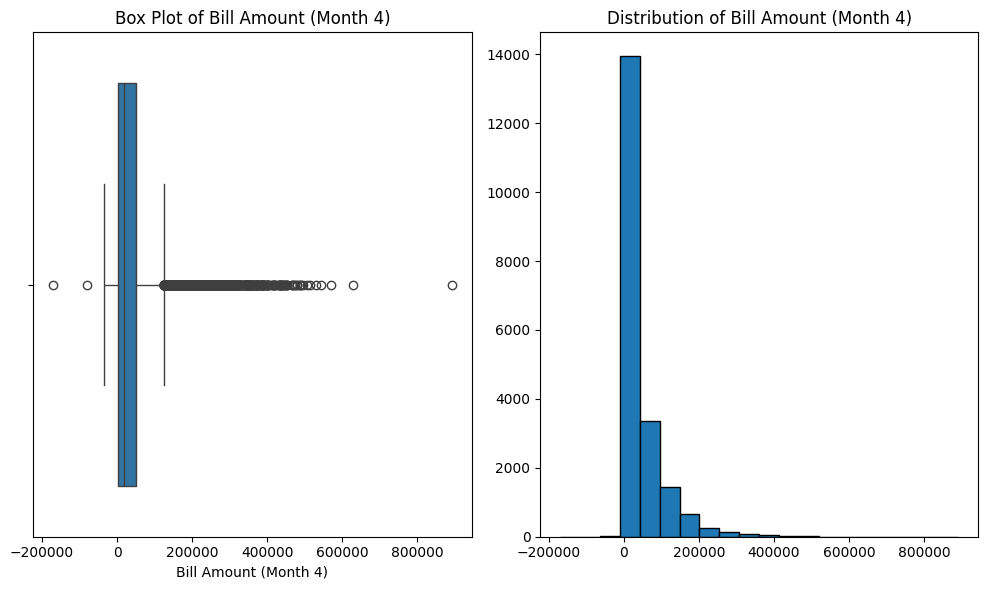

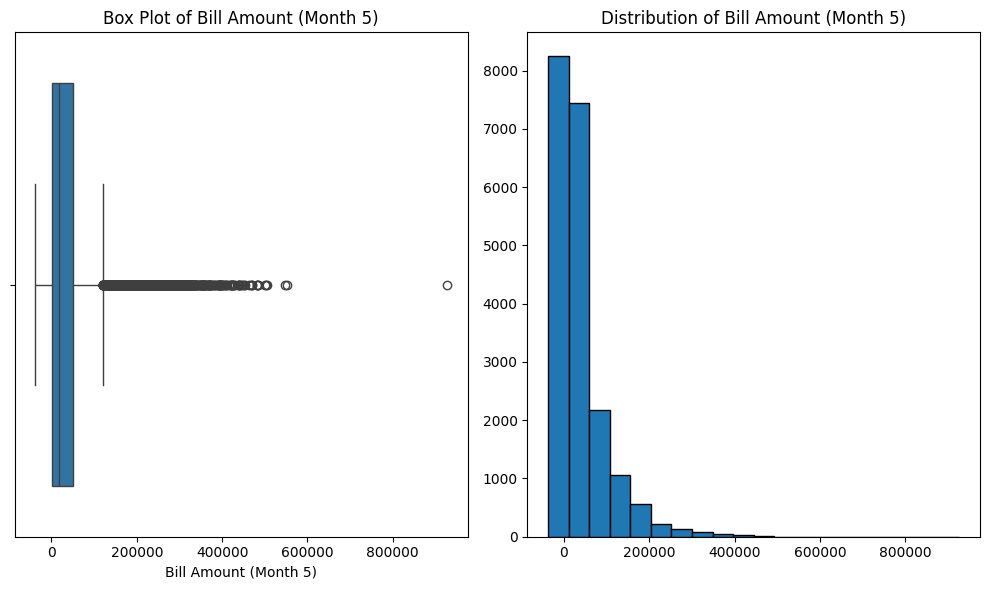

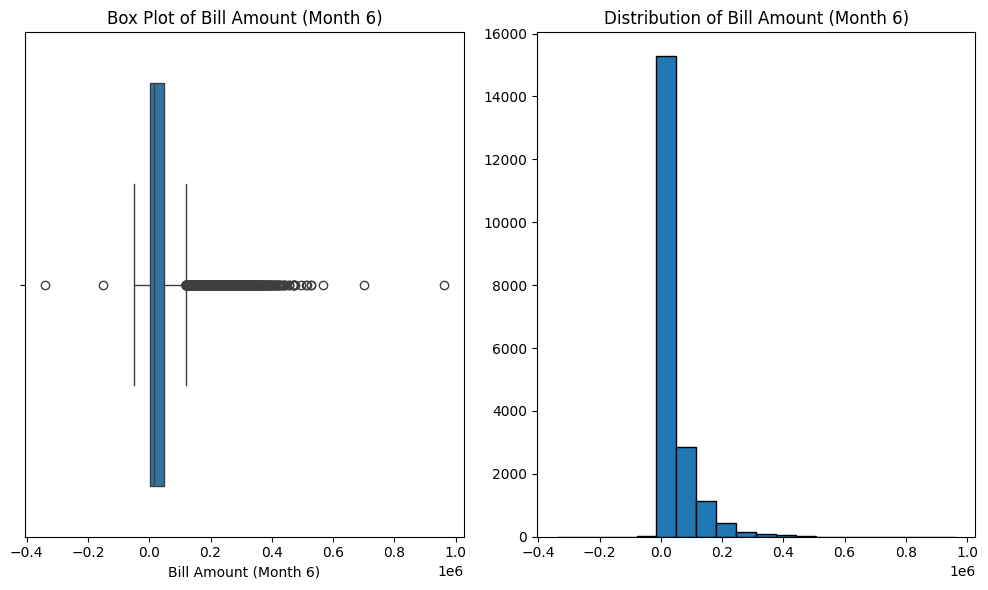

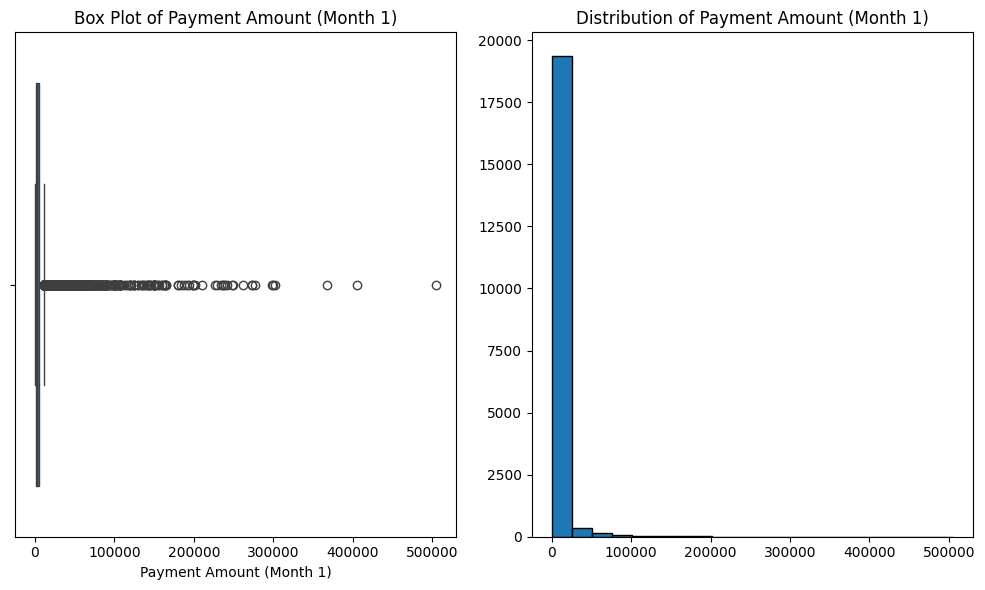

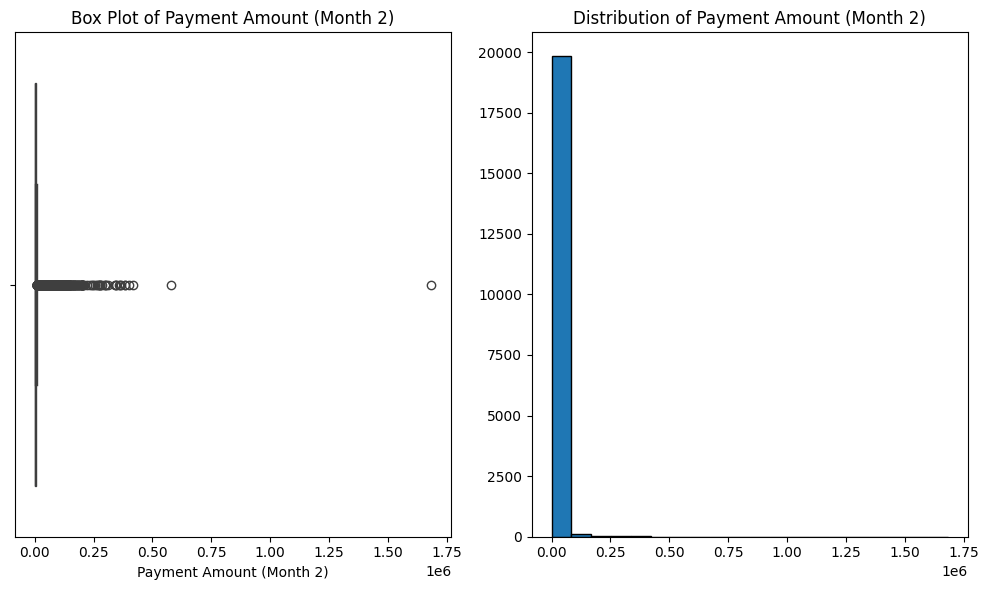

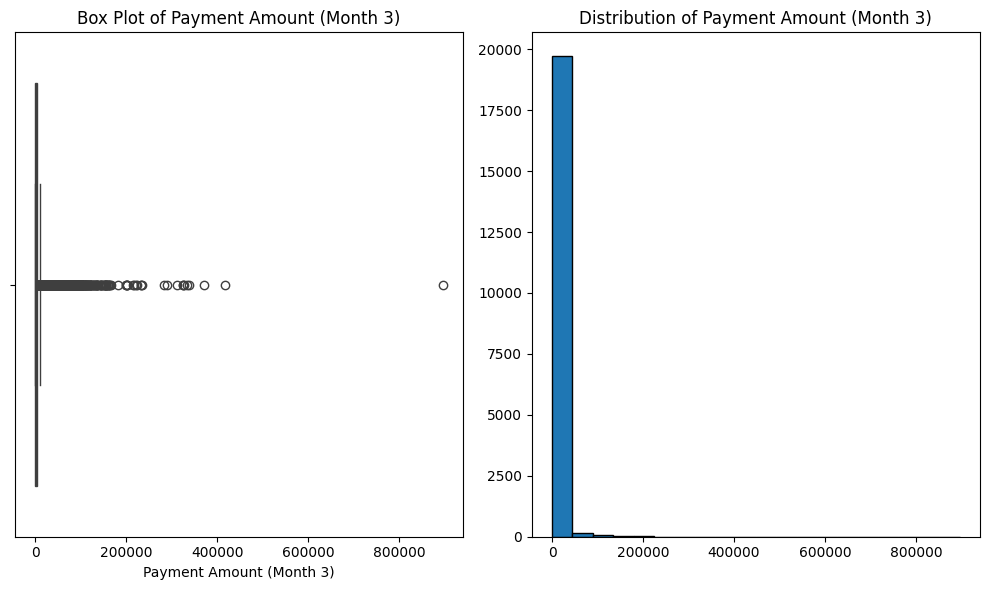

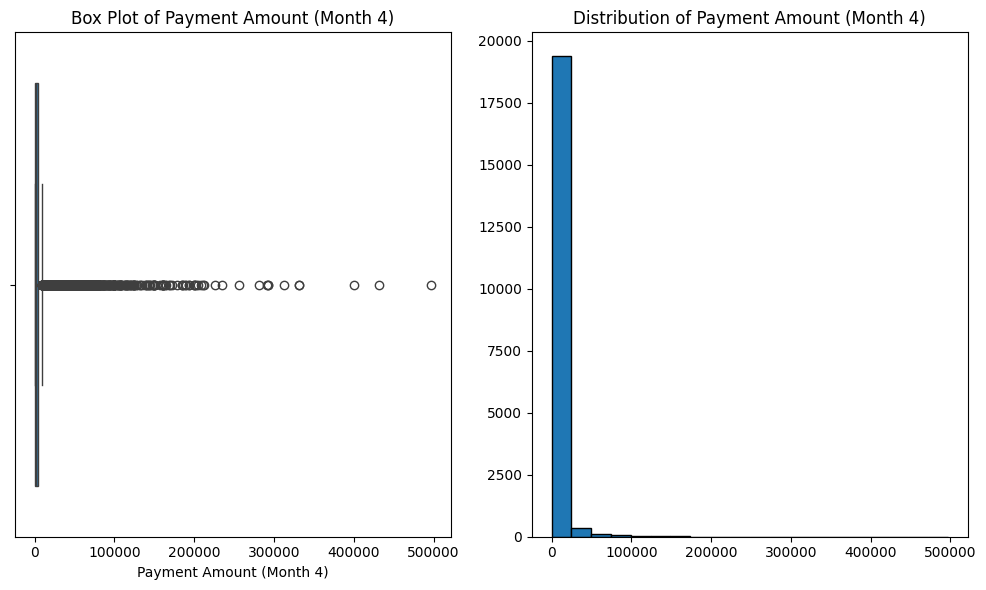

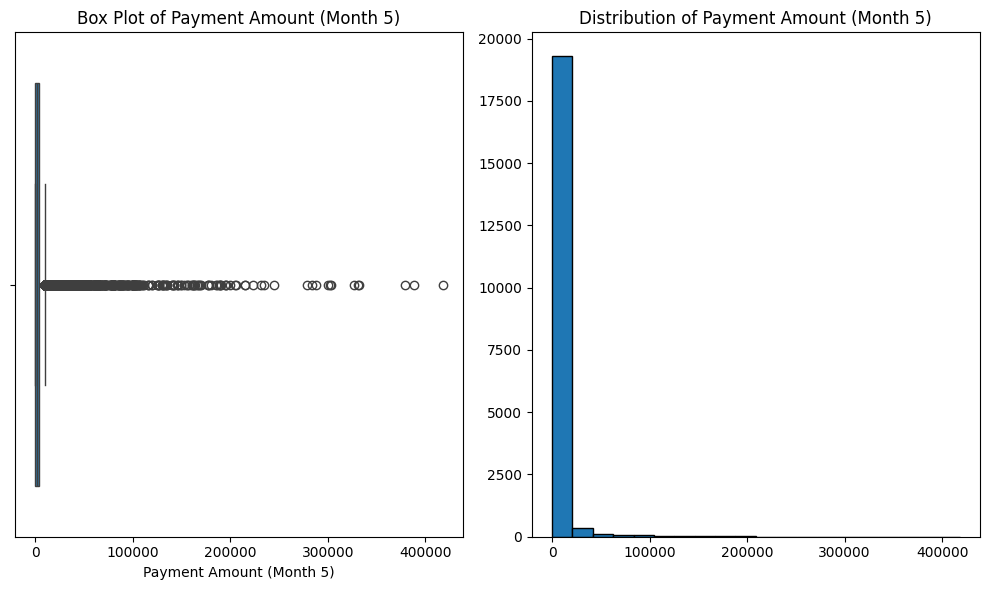

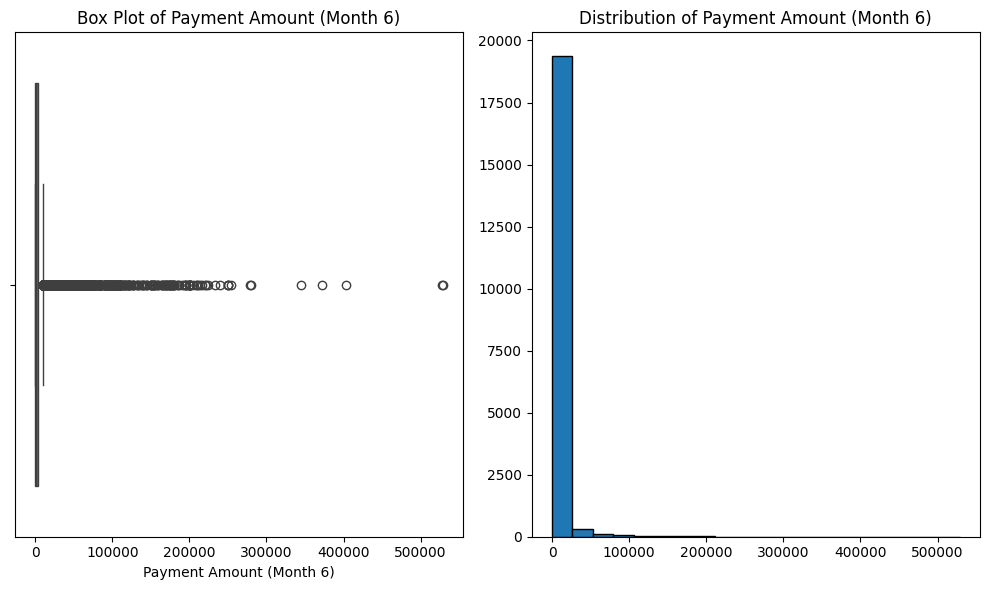

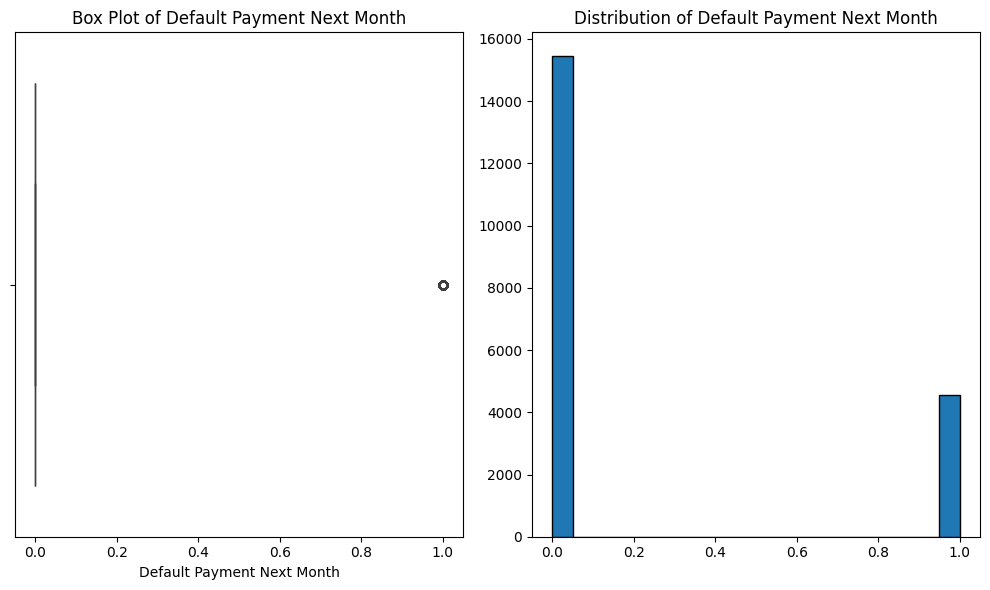

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numerical columns and create box plots and histograms
for column in train_df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(10, 6))

  # Box plot
  plt.subplot(1, 2, 1)
  sns.boxplot(x=train_df[column])
  plt.title(f'Box Plot of {column}')

  # Distribution plot (Histogram)
  plt.subplot(1, 2, 2)
  plt.hist(train_df[column], bins=20, edgecolor='black')
  plt.title(f'Distribution of {column}')

  plt.tight_layout()  # Adjusts subplots to fit into figure area.
  plt.show()


# **Data Preprocessing**

# **Data Split**

In [59]:
# Define features and target
X = train_df.drop(columns=['ID', 'Default Payment Next Month'])  # Exclude 'ID' and the target column
y = train_df['Default Payment Next Month']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Class Imbalance**

In [61]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# Calculate class weights for y_train
class_weights = calculate_class_weights(y_train)
print("Class weights:", class_weights)


Class weights: {0: 0.647615963733506, 1: 2.1935837674801206}


# **Feature Encoding**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import pandas as pd

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2. Encode target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# 3. One-hot encode categorical features
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

categorical_cols = X_train.select_dtypes(include=['object']).columns
enc = OneHotEncoder(handle_unknown='ignore')

X_train_encoded = enc.fit_transform(X_train[categorical_cols]).toarray()
X_test_encoded = enc.transform(X_test[categorical_cols]).toarray()

# 4. Select numerical features and combine with encoded features
X_train_numerical = X_train.select_dtypes(include=['number']).to_numpy()
X_test_numerical = X_test.select_dtypes(include=['number']).to_numpy()

X_train = np.concatenate((X_train_encoded, X_train_numerical), axis=1)
X_test = np.concatenate((X_test_encoded, X_test_numerical), axis=1)


In [63]:
y_train

array([0, 1, 0, ..., 1, 0, 0])


# **Principal Component Analysis (PCA)**

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train model using the PCA-transformed data
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3110
           1       0.58      0.33      0.42       891

    accuracy                           0.80      4001
   macro avg       0.70      0.63      0.65      4001
weighted avg       0.77      0.80      0.77      4001



# **Model Training by XGBoost (Extreme Gradient Boosting)**

In [65]:
#Train the model
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=class_weights[0] / class_weights[1])  # Adjust class weights if needed
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# **Model Testing**

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get probabilities for class 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Change threshold to 0.2
y_pred = (y_pred_proba > 0.2).astype(int)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.7965508622844288
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3110
           1       0.56      0.42      0.48       891

    accuracy                           0.80      4001
   macro avg       0.70      0.66      0.68      4001
weighted avg       0.78      0.80      0.79      4001

Confusion Matrix:
 [[2814  296]
 [ 518  373]]


# **Precision Recall**
The Precision-Recall curve demonstrates the model’s ability to effectively identify fraudulent transactions.

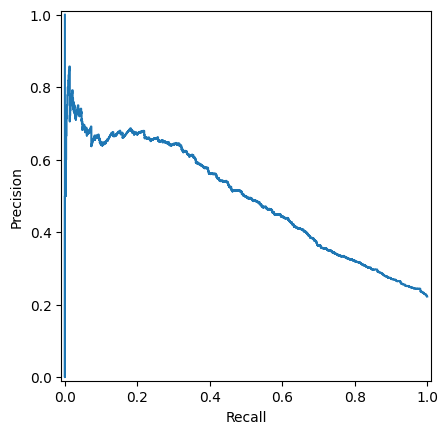

In [67]:
# precision recall

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Assuming you have y_test and y_pred_proba from your model
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

# **Conlusion:**
The model exhibits a strong balance between precision and recall on the PR curve, effectively identifying fraudulent transactions while minimizing false positives.

# **ROC Curve**

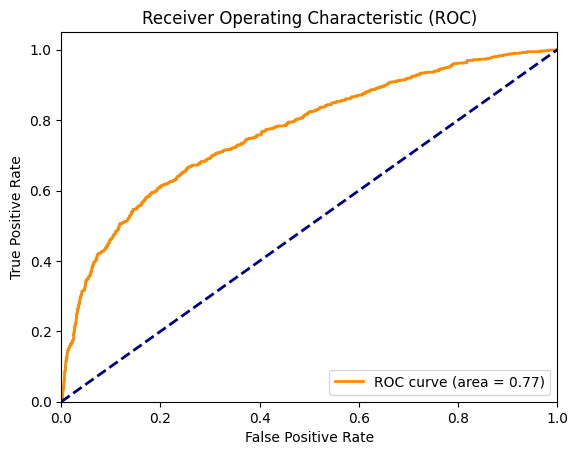

In [69]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate using the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

#ROC ANALYSIS

from sklearn.metrics import roc_curve, auc

# Assuming you have y_test and y_pred_proba from your model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Conclusion:**
The model's performance has improved significantly after hyperparameter tuning, as evidenced by the increased AUC of 0.77 on the ROC curve.